# Problem Set 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

### Reaction Rate

(a) Converted temperature data

In [2]:
experimentinput = np.loadtxt("RateT.txt", delimiter=",")
experiment = np.transpose(experimentinput)
temperature_c = experiment[0]
reaction_rate = experiment[1]

temperature_k = temperature_c + 273.15 # convert celsius to kelvin
print(temperature_k)

[273.15 373.15 473.15 573.15 673.15 773.15 873.15]


(b) Arrhenius plot

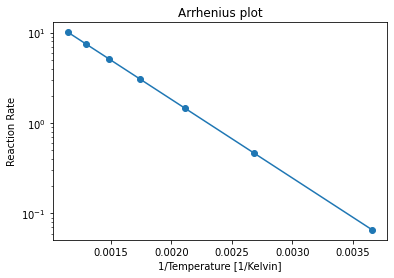

In [3]:
plt.figure(1)
plt.plot(1/temperature_k, reaction_rate, '-o')
plt.xlabel("1/Temperature [1/Kelvin]")
plt.ylabel("Reaction Rate")
plt.title("Arrhenius plot")
plt.semilogy()
plt.show()

(c) Reaction rate is given by $k=A e^{-\frac{E_a}{RT}}$, if we take natural log of both sides
$$\ln k = \ln{(A)}-\frac{E_a}{RT}$$
Since we are using semi-log plot, and $\ln k$ and $1/T$ are linearly related, the Arrhenius plot is a straight line.

(d) Activation energy $(E_a)$ is related to the slope $(-\frac{E_a}{R})$, and the prefactor $(A)$ is related to the intersection $(\ln A)$ between our line and y-axis.
$$A = 100.1626 \quad\quad\quad E_a = 16.6417 \text{ kJ/mol}$$

In [4]:
def arrhenius_test(x, a, b):
    return a+b*x

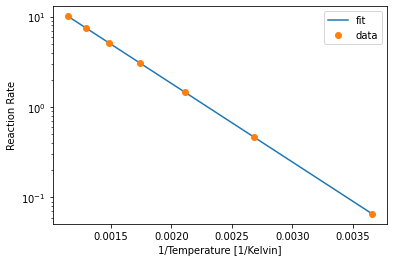

In [5]:
plt.figure(2)
param, param_cov = curve_fit(arrhenius_test, 1/temperature_k, np.log(reaction_rate))
ans=param[0]+param[1]/temperature_k
plt.plot(1/temperature_k, np.exp(ans), label = 'fit')
plt.plot(1/temperature_k, reaction_rate, 'o', label = 'data')
plt.xlabel("1/Temperature [1/Kelvin]")
plt.ylabel("Reaction Rate")
plt.semilogy()
plt.legend()
plt.show()

In [6]:
print('ln A = '+str(param[0])+'\n-E_a/R = '+str(param[1])+' K')
print('A = '+str(np.exp(param[0]))+'\nE_a = '+str(param[1]*(-8.3145))+' J/mol')

ln A = 4.606795449534403
-E_a/R = -2001.5292727109183 K
A = 100.16265850029168
E_a = 16641.715137954932 J/mol


### Heat Capacity

In [7]:
experimentinput1 = np.loadtxt("HeatCapacity.txt", delimiter=",")
experiment1 = np.transpose(experimentinput1)
temperature_hc = experiment1[0]
heat_capacity = experiment1[1]

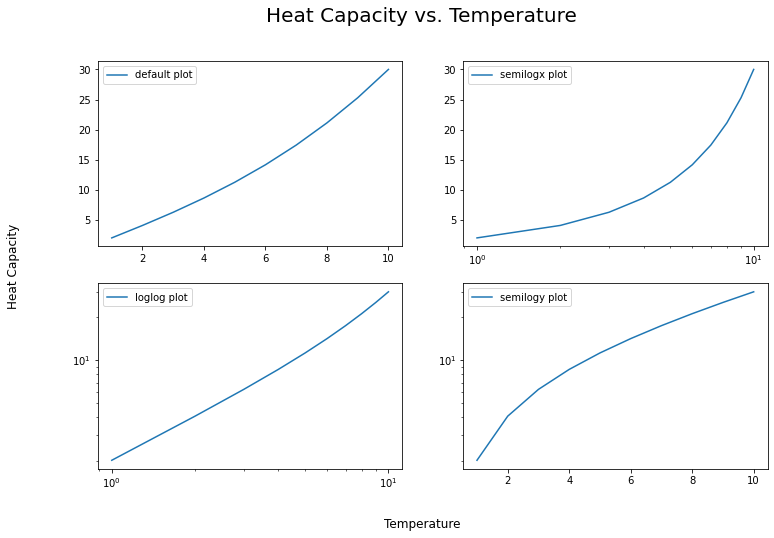

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(12,7.5))

plt.subplot(2,2,1)
plt.plot(temperature_hc, heat_capacity, label='default plot')
plt.legend()

plt.subplot(2,2,2)
plt.semilogx(temperature_hc, heat_capacity, label='semilogx plot')
plt.legend()

plt.subplot(2,2,3)
plt.loglog(temperature_hc, heat_capacity, label='loglog plot')
plt.legend()

plt.subplot(2,2,4)
plt.semilogy(temperature_hc, heat_capacity, label='semilogy plot')
plt.legend()

fig.suptitle("Heat Capacity vs. Temperature", fontsize=20)
fig.supxlabel("Temperature")
fig.supylabel("Heat Capacity")
plt.show()

(b)By curve fitting $C_V = A T + B T^3$ $$A = 2.0 \quad\quad\quad\quad B = 0.01$$

In [9]:
def capacity_test(x, a, b):
    return a*x+b*(x**3)

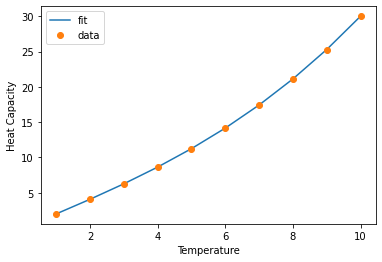

In [10]:
plt.figure(3)
param, param_cov = curve_fit(capacity_test, temperature_hc, heat_capacity)
ans=param[0]*temperature_hc+param[1]*temperature_hc**3
plt.plot(temperature_hc, ans, label = 'fit')
plt.plot(temperature_hc, heat_capacity, 'o', label = 'data')
plt.xlabel("Temperature")
plt.ylabel("Heat Capacity")
plt.legend()
plt.show()

In [11]:
print('A = '+str(param[0])+'\nB = '+str(param[1]))

A = 2.0
B = 0.009999999999999997


### Flow Rate

In [12]:
experimentinput2 = np.loadtxt("Flow.txt", delimiter=",")
experiment2 = np.transpose(experimentinput2)
tube_diameter = experiment2[0]
flow_rate = experiment2[1]

(a) Plot: Water Flow Rate vs. Tube Diameter

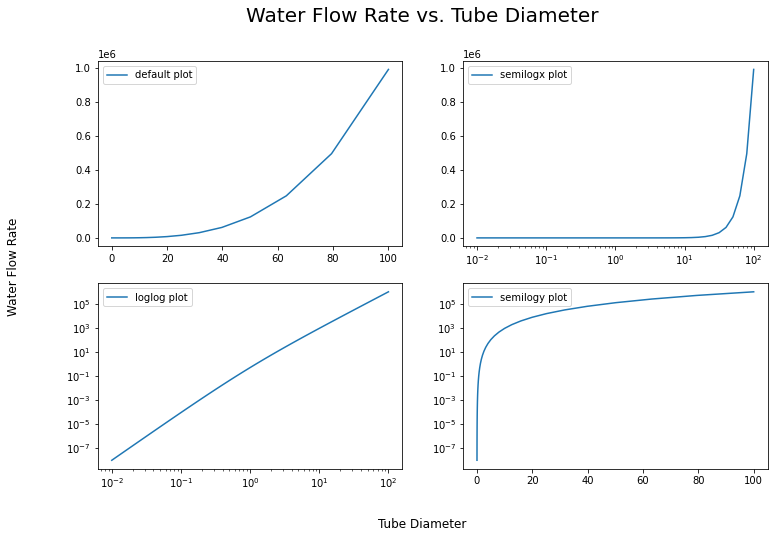

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12,7.5))

plt.subplot(2,2,1)
plt.plot(tube_diameter, flow_rate, label='default plot')
plt.legend()

plt.subplot(2,2,2)
plt.semilogx(tube_diameter, flow_rate, label='semilogx plot')
plt.legend()

plt.subplot(2,2,3)
plt.loglog(tube_diameter, flow_rate, label='loglog plot')
plt.legend()

plt.subplot(2,2,4)
plt.semilogy(tube_diameter, flow_rate, label='semilogy plot')
plt.legend()

fig.suptitle("Water Flow Rate vs. Tube Diameter", fontsize=20)
fig.supxlabel("Tube Diameter")
fig.supylabel("Water Flow Rate")
plt.show()

(b) Log-log plot is almost a straight line, which indicates a linear relation between the natural log of flow rate and tube diameter.
$$\ln \text{Rate} \approx \text{const} + A \ln \text{Diameter}$$
And we can measure the slope of this straight line to get quantitative results from the log-log plot. The other plots cannot present quantitative information as clearly as the log-log plot in our case.

(c) At small $d$, slope $A$ is larger; and at large $d$, slope $A$ is smaller.

(d) So the water flow rate and tube diameter are approximately related by power law, and power $A$ is average slope of the curve in log-log plot.
$$\text{Rate} \approx e^\text{const} \cdot \text{Diameter}^A$$
By curve fit, 
$$\text{Rate} \approx 0.26 \cdot \text{Diameter}^{3.5}$$

In [14]:
def flow_test(x, a, b):
    return a+b*x

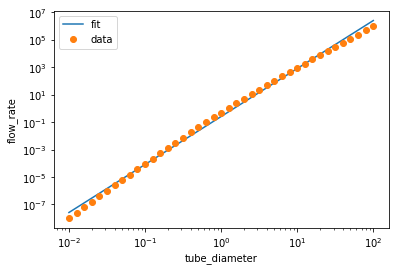

In [15]:
plt.figure(4)
param, param_cov = curve_fit(flow_test, np.log(tube_diameter), np.log(flow_rate))
ans=param[0]+param[1]*np.log(tube_diameter)
plt.plot(tube_diameter, np.exp(ans), label = 'fit')
plt.plot(tube_diameter, flow_rate, 'o', label = 'data')
plt.xlabel("tube_diameter")
plt.ylabel("flow_rate")
plt.loglog()
plt.legend()
plt.show()

In [16]:
print('exp(const) = '+str(np.exp(param[0]))+'\nA = '+str(param[1]))

exp(const) = 0.2586689685359833
A = 3.500000922004831
